In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

# Experiment 1b
**Comparison of increase in the percentage of recognized words using the following methods:**

0. Nothing. Check amount of existing words in the texts without any processing or correction module.
1. Preprocessing of the text. Consists on removing weird characters and single consonants.
2. Preprocessing + spelling correction algorithm by symspellpy: \
    symspellpy link: https://pypi.org/project/symspellpy/ \
    SymSpell link: https://github.com/wolfgarbe/SymSpell

4. Preprocessing + BERT (models extracted from huggingface transformers)
5. Preprocessing + spelling correction + BERT

### Experiments data load

#### 0. Nothing

In [52]:
results0_bloc1 = pd.read_csv("../data/processed/results_bloc1_processed_raw.csv")
results0_bloc2 = pd.read_csv("../data/processed/results_bloc2_processed_raw.csv")

#### 1. Preprocess

In [53]:
results1_bloc1 = pd.read_csv("../data/processed/results_bloc1_processed_preprocess.csv")
results1_bloc2 = pd.read_csv("../data/processed/results_bloc2_processed_preprocess.csv")

#### 2. Preprocess + symspell

In [54]:
results2_bloc1 = pd.read_csv("../data/processed/results_bloc1_processed_symspell.csv")
results2_bloc2 = pd.read_csv("../data/processed/results_bloc2_processed_symspell.csv")

#### 3. Preprocess + BERT

In [55]:
results3_bloc1 = pd.read_csv("../data/processed/results_bloc1_processed_bert.csv")
results3_bloc2 = pd.read_csv("../data/processed/results_bloc2_processed_bert.csv")

#### 4. Preprocess + symspell + BERT

In [56]:
results4_bloc1 = pd.read_csv("../data/processed/results_bloc1_processed.csv")
results4_bloc2 = pd.read_csv("../data/processed/results_bloc2_processed.csv")

### Join experiments by bloc

In [57]:
# check sizes bloc1
print(results0_bloc1.shape)
print(results1_bloc1.shape)
print(results2_bloc1.shape)
print(results3_bloc1.shape)
print(results4_bloc1.shape)

(414, 17)
(414, 17)
(414, 17)
(414, 17)
(414, 17)


In [58]:
# check sizes bloc2
print(results0_bloc2.shape)
print(results1_bloc2.shape)
print(results2_bloc2.shape)
print(results3_bloc2.shape)
print(results4_bloc2.shape)

(531, 17)
(531, 17)
(531, 17)
(531, 17)
(531, 17)


In [59]:
results0_bloc1['experiment'] = '0_raw'
results1_bloc1['experiment'] = '1_preprocess'
results2_bloc1['experiment'] = '2_symspell'
results3_bloc1['experiment'] = '3_BERT'
results4_bloc1['experiment'] = '4_symspell_BERT'

results0_bloc2['experiment'] = '0_raw'
results1_bloc2['experiment'] = '1_preprocess'
results2_bloc2['experiment'] = '2_symspell'
results3_bloc2['experiment'] = '3_BERT'
results4_bloc2['experiment'] = '4_symspell_BERT'

In [60]:
bloc1 = pd.concat([results0_bloc1, results1_bloc1, results2_bloc1, results3_bloc1, results4_bloc1], ignore_index=True)
bloc2 = pd.concat([results0_bloc2, results1_bloc2, results2_bloc2, results3_bloc2, results4_bloc2], ignore_index=True)

bloc1['bloc'] = 'bloc1'
bloc2['bloc'] = 'bloc2'

data = pd.concat([bloc1, bloc2], ignore_index=True)

In [61]:
data.head()

,revista,publicacio,idiomes,es_perc,ca_perc,fr_perc,it_perc,en_perc,non_identified_perc,es_existing,ca_existing,fr_existing,it_existing,en_existing,non_identified_existing,n_words,total_existing,experiment,bloc
0,391,19170202.txt,['fr'],NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,87.34,NaN,NaN,NaN,790,87.34,0_raw,bloc1
1,391,19170303.txt,['fr'],NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,83.24,NaN,NaN,NaN,1820,83.24,0_raw,bloc1
2,391,19170605.txt,['fr'],NaN,NaN,86.75,NaN,NaN,13.25,NaN,NaN,87.18,NaN,NaN,80.39,1924,86.28,0_raw,bloc1
3,391,19170706.txt,['fr'],NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,84.44,NaN,NaN,NaN,257,84.44,0_raw,bloc1
4,391,19200312.txt,"['fr', 'ca']",NaN,53.35,46.52,NaN,NaN,0.13,NaN,34.31,29.85,NaN,NaN,25.00,3190,32.23,0_raw,bloc1


# Metrics

### Overall % of existing words

In [62]:
data[['experiment', 'total_existing']].groupby(['experiment']).mean().round(2)

,total_existing
experiment,
0_raw,77.86
1_preprocess,79.40
2_symspell,84.56
3_BERT,85.10
4_symspell_BERT,91.73


In [63]:
pd.pivot_table(data[['bloc','experiment', 'total_existing']].groupby(['bloc','experiment']).mean().round(2),
               values='total_existing', index=['experiment'], columns=['bloc']).reset_index()

bloc,experiment,bloc1,bloc2
0,0_raw,81.25,75.21
1,1_preprocess,82.66,76.87
2,2_symspell,87.46,82.29
3,3_BERT,87.19,83.47
4,4_symspell_BERT,92.41,91.19


In [64]:
summarized_table = pd.pivot_table(data[['experiment', 'revista', 'total_existing']].groupby(['experiment', 'revista']).mean().round(2),
               values='total_existing', index=['experiment'], columns=['revista'])
summarized_table = summarized_table[sorted(list(summarized_table.columns), key=str.lower)]

In [65]:
summarized_table[summarized_table.columns[:13]].reset_index()

revista,experiment,391,AC,algol,amicarts,anti,arcvoltaic,Art junta de museus,cobalto,cobalto49,dauset,esportcat,Fulls grocs,Gaseta de les Arts
0,0_raw,72.68,79.54,92.23,82.00,63.30,62.71,85.24,79.57,80.14,86.64,84.19,85.73,77.19
1,1_preprocess,74.29,80.29,93.98,84.12,64.70,63.59,87.99,80.81,81.80,89.11,85.20,88.10,79.33
2,2_symspell,74.87,83.40,95.01,88.11,73.65,69.78,89.50,87.72,88.12,91.99,88.47,90.58,84.30
3,3_BERT,80.23,83.93,95.57,88.37,75.48,74.77,90.16,86.27,86.90,91.96,89.14,91.72,85.17
4,4_symspell_BERT,80.86,86.89,97.11,93.64,87.60,81.04,92.78,91.55,92.13,95.31,93.31,94.60,92.25


In [66]:
summarized_table[summarized_table.columns[13:]].reset_index()

revista,experiment,helix,iberia,instant,matrencada,monitor,Nova revista,Proa,Revista,Revista nova,themis,trocos,unenemicpob,Vell i nou
0,0_raw,68.68,81.94,75.95,69.10,82.39,78.90,83.19,73.66,70.92,75.82,81.04,77.11,75.25
1,1_preprocess,70.42,83.47,77.19,69.79,83.57,79.58,83.86,74.95,72.23,77.51,83.60,78.46,77.28
2,2_symspell,79.59,90.77,80.60,73.73,86.84,82.12,87.41,81.66,78.03,83.86,87.00,82.97,82.25
3,3_BERT,78.26,87.50,85.72,78.06,88.08,84.67,88.67,82.31,80.78,84.30,85.68,84.54,83.66
4,4_symspell_BERT,89.04,93.73,90.19,85.59,93.11,89.73,92.24,91.39,89.62,92.40,90.58,90.81,90.82


### Overall number of existing words

In [67]:
data['n_existing_words'] = (data['total_existing']*data['n_words']/100).astype(int)

In [68]:
data[['experiment', 'n_existing_words']].groupby(['experiment']).mean().astype(int)

,n_existing_words
experiment,
0_raw,5882
1_preprocess,5752
2_symspell,6299
3_BERT,5959
4_symspell_BERT,6475


In [69]:
pd.pivot_table(data[['bloc','experiment', 'n_existing_words']].groupby(['bloc','experiment']).mean().astype(int),
               values='n_existing_words', index=['experiment'], columns=['bloc'])

bloc,bloc1,bloc2
experiment,,
0_raw,5542,6146
1_preprocess,5444,5993
2_symspell,5925,6590
3_BERT,5574,6260
4_symspell_BERT,5984,6858


In [70]:
summarized_table = pd.pivot_table(data[['experiment', 'revista', 'n_existing_words']].groupby(['experiment', 'revista']).mean().astype(int),
               values='n_existing_words', index=['experiment'], columns=['revista'])
summarized_table = summarized_table[sorted(list(summarized_table.columns), key=str.lower)]

In [71]:
summarized_table[summarized_table.columns[:13]].reset_index()

revista,experiment,391,AC,algol,amicarts,anti,arcvoltaic,Art junta de museus,cobalto,cobalto49,dauset,esportcat,Fulls grocs,Gaseta de les Arts
0,0_raw,771,4681,1246,6113,3064,482,3527,17575,1028,751,8667,1826,3715
1,1_preprocess,751,4215,1248,5920,3095,454,3244,17504,1024,744,8532,1806,3509
2,2_symspell,812,4613,1275,6401,3674,533,3340,20366,1164,783,8964,1884,3832
3,3_BERT,774,4321,1251,6043,3368,487,3273,18208,1054,754,8676,1839,3665
4,4_symspell_BERT,825,4612,1278,6491,3921,556,3363,20229,1170,786,9081,1908,3999


In [72]:
summarized_table[summarized_table.columns[13:]].reset_index()

revista,experiment,helix,iberia,instant,matrencada,monitor,Nova revista,Proa,Revista,Revista nova,themis,trocos,unenemicpob,Vell i nou
0,0_raw,1721,4979,2275,3411,8061,19012,673,8377,2523,2611,823,874,3046
1,1_preprocess,1723,4922,2238,3393,8080,18156,665,8319,2463,2570,804,855,2940
2,2_symspell,2046,5660,2430,3740,8558,18931,715,9332,2756,2871,848,924,3238
3,3_BERT,1819,5067,2376,3580,8267,18440,680,8771,2615,2694,814,875,3076
4,4_symspell_BERT,2109,5655,2556,3948,8726,19150,725,9799,2900,2989,858,940,3368


### Division by language

In [73]:
# create columns number of existing words by lang for each document
data['ca_existing_words'] = data['ca_perc'] * data['ca_existing'] * data['n_words'] /10000
data['es_existing_words'] = data['es_perc'] * data['es_existing'] * data['n_words'] /10000
data['fr_existing_words'] = data['fr_perc'] * data['fr_existing'] * data['n_words'] /10000
data['en_existing_words'] = data['en_perc'] * data['en_existing'] * data['n_words'] /10000
data['it_existing_words'] = data['it_perc'] * data['it_existing'] * data['n_words'] /10000

In [74]:
# create columns nunmber of words by lang for each document (existing and non-existing)
data['ca_words'] = data['ca_perc'] * data['n_words'] /100
data['es_words'] = data['es_perc'] * data['n_words'] /100
data['fr_words'] = data['fr_perc'] * data['n_words'] /100
data['en_words'] = data['en_perc'] * data['n_words'] /100
data['it_words'] = data['it_perc'] * data['n_words'] /100

In [75]:
lang_data = data[['experiment', 'ca_words', 'es_words', 'fr_words', 'en_words', 'it_words', 'ca_existing_words', 'es_existing_words',
                  'fr_existing_words', 'en_existing_words', 'it_existing_words']].groupby(['experiment']).sum()
lang_data

,ca_words,es_words,fr_words,en_words,it_words,ca_existing_words,es_existing_words,fr_existing_words,en_existing_words,it_existing_words
experiment,,,,,,,,,,
0_raw,6.019307e+06,925211.7807,109765.6551,0.0,15222.7929,4.676344e+06,768441.857358,74848.159301,0.0,8403.451051
1_preprocess,5.794649e+06,894103.2799,108443.4370,0.0,14441.4157,4.578130e+06,756454.547425,75948.329647,0.0,8424.089067
2_symspell,5.942314e+06,947006.6512,116689.4255,0.0,15457.3454,4.977466e+06,866631.204979,81896.943315,0.0,9451.046195
3_BERT,5.580236e+06,880550.8710,101264.9714,0.0,14240.7335,4.747460e+06,775634.782941,81934.736126,0.0,9274.500049
4_symspell_BERT,5.598934e+06,920320.3943,107717.3821,0.0,14197.2816,5.145523e+06,860833.097691,86990.734113,0.0,9374.963929


In [76]:
lang_data_bloc = data[['bloc', 'experiment', 'ca_words', 'es_words', 'fr_words', 'en_words', 'it_words', 'ca_existing_words', 'es_existing_words',
                  'fr_existing_words', 'en_existing_words', 'it_existing_words']].groupby(['bloc', 'experiment']).sum()
lang_data_bloc

ca_words     es_words    fr_words  en_words  \
bloc  experiment                                                         
bloc1 0_raw            1.892747e+06  834310.5238  44480.4412       0.0   
      1_preprocess     1.831396e+06  805667.5042  44411.5779       0.0   
      2_symspell       1.868701e+06  853360.8299  47960.2436       0.0   
      3_BERT           1.774184e+06  793096.5334  41522.5096       0.0   
      4_symspell_BERT  1.781619e+06  828296.5513  43879.0607       0.0   
bloc2 0_raw            4.126560e+06   90901.2569  65285.2139       0.0   
      1_preprocess     3.963254e+06   88435.7757  64031.8591       0.0   
      2_symspell       4.073613e+06   93645.8213  68729.1819       0.0   
      3_BERT           3.806052e+06   87454.3376  59742.4618       0.0   
      4_symspell_BERT  3.817315e+06   92023.8430  63838.3214       0.0   

                         it_words  ca_existing_words  es_existing_words  \
bloc  experiment                                                          
bloc1 0_raw             1536.2957       1.556601e+06      693742.389281   
      1_preprocess      2169.9127       1.528528e+06      681872.149229   
      2_symspell        2198.5215       1.625700e+06      781387.142094   
      3_BERT            2162.6674       1.562157e+06      699366.303019   
      4_symspell_BERT   1944.6385       1.654679e+06      775284.478769   
bloc2 0_raw            13686.4972       3.119743e+06       74699.468077   
      1_preprocess     12271.5030       3.049601e+06       74582.398196   
      2_symspell       13258.8239       3.351765e+06       85244.062885   
      3_BERT           12078.0661       3.185303e+06       76268.479922   
      4_symspell_BERT  12252.6431       3.490843e+06       85548.618922   

                       fr_existing_words  en_existing_words  it_existing_words  
bloc  experiment                                                                
bloc1 0_raw                 31101.027787                0.0         810.064170  
      1_preprocess          31694.598451                0.0        1166.850031  
      2_symspell            34294.099069                0.0        1234.184580  
      3_BERT                34195.582169                0.0        1282.805217  
      4_symspell_BERT       36084.362027                0.0        1199.162901  
bloc2 0_raw                 43747.131514                0.0        7593.386882  
      1_preprocess          44253.731195                0.0        7257.239036  
      2_symspell            47602.844246                0.0        8216.861616  
      3_BERT                47739.153957                0.0        7991.694832  
      4_symspell_BERT       50906.372086                0.0        8175.801028

In [77]:
# create columns percentage of existing words of each language (aggregated across all documents)
lang_data['ca_perc'] = lang_data['ca_existing_words'] / lang_data['ca_words'] *100
lang_data['es_perc'] = lang_data['es_existing_words'] / lang_data['es_words'] *100
lang_data['fr_perc'] = lang_data['fr_existing_words'] / lang_data['fr_words'] *100
lang_data['en_perc'] = lang_data['en_existing_words'] / lang_data['en_words'] *100
lang_data['it_perc'] = lang_data['it_existing_words'] / lang_data['it_words'] *100

In [90]:
perc_lang_data = lang_data[['ca_perc','es_perc','fr_perc','it_perc']].round(2).reset_index()
perc_lang_data

,experiment,ca_perc,es_perc,fr_perc,it_perc
0,0_raw,77.69,83.06,68.19,55.20
1,1_preprocess,79.01,84.60,70.03,58.33
2,2_symspell,83.76,91.51,70.18,61.14
3,3_BERT,85.08,88.09,80.91,65.13
4,4_symspell_BERT,91.90,93.54,80.76,66.03


In [91]:
data[['experiment', 'ca_existing_words', 'es_existing_words', 'fr_existing_words', 'it_existing_words']] \
.groupby(['experiment']).sum().astype(int).reset_index()

,experiment,ca_existing_words,es_existing_words,fr_existing_words,it_existing_words
0,0_raw,4676344,768441,74848,8403
1,1_preprocess,4578129,756454,75948,8424
2,2_symspell,4977465,866631,81896,9451
3,3_BERT,4747459,775634,81934,9274
4,4_symspell_BERT,5145522,860833,86990,9374


In [92]:
data[['bloc', 'experiment', 'ca_existing_words', 'es_existing_words', 'fr_existing_words', 'it_existing_words']] \
.groupby(['bloc', 'experiment']).sum().astype(int).reset_index()

,bloc,experiment,ca_existing_words,es_existing_words,fr_existing_words,it_existing_words
0,bloc1,0_raw,1556601,693742,31101,810
1,bloc1,1_preprocess,1528528,681872,31694,1166
2,bloc1,2_symspell,1625700,781387,34294,1234
3,bloc1,3_BERT,1562157,699366,34195,1282
4,bloc1,4_symspell_BERT,1654679,775284,36084,1199
5,bloc2,0_raw,3119743,74699,43747,7593
6,bloc2,1_preprocess,3049601,74582,44253,7257
7,bloc2,2_symspell,3351765,85244,47602,8216
8,bloc2,3_BERT,3185302,76268,47739,7991
9,bloc2,4_symspell_BERT,3490843,85548,50906,8175


# Plots

In [81]:
sns.set_theme(style="whitegrid", palette="pastel")

### Average % and number of existing words

#### all data

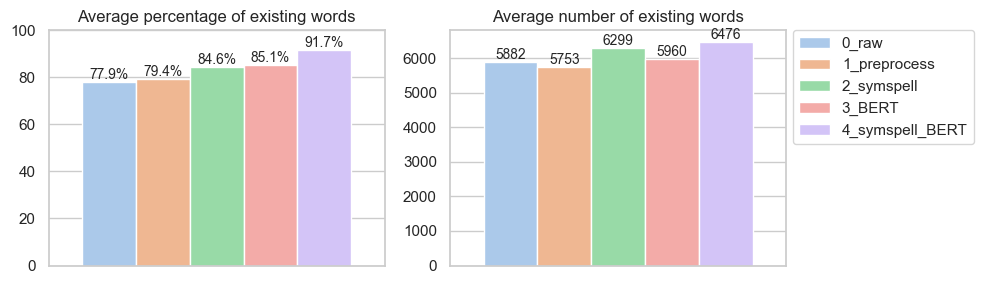

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ax[0] = sns.barplot(ax = ax[0], y='total_existing', hue='experiment', data=data, errorbar=None, legend=False)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='{:.1f}%', fontsize=10)
ax[0].set(ylim=(0, 100), xlabel=None, ylabel=None)
ax[0].set(title='Average percentage of existing words')


ax[1] = sns.barplot(ax = ax[1], y='n_existing_words', hue='experiment', data=data, errorbar=None)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='{:.0f}', fontsize=10)
#place legend outside top right corner of plot
ax[1].set(title='Average number of existing words', xlabel=None, ylabel=None)

#place legend outside top right corner of plot
ax[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

fig.tight_layout()
fig.savefig('1_existing_words.png');

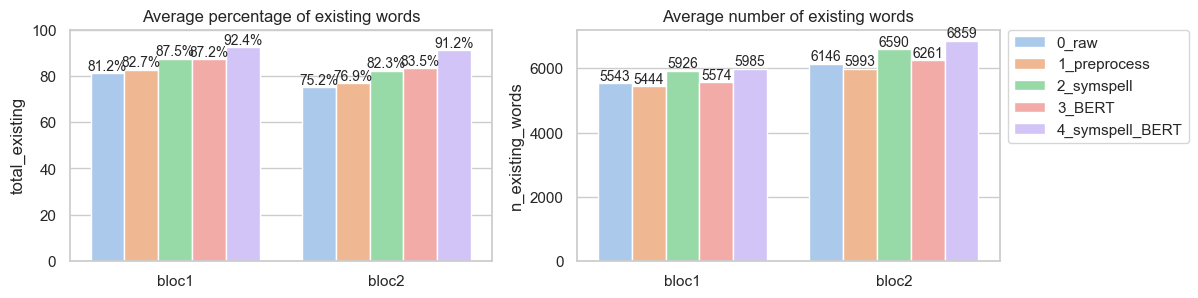

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

ax[0] = sns.barplot(ax = ax[0], x='bloc', y='total_existing', hue='experiment', data=data, errorbar=None, legend=False)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='{:.1f}%', fontsize=10)
ax[0].set(ylim=(0, 100), xlabel=None)
ax[0].set(title='Average percentage of existing words')


ax[1] = sns.barplot(ax = ax[1], x='bloc', y='n_existing_words', hue='experiment', data=data, errorbar=None)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='{:.0f}', fontsize=10)
#place legend outside top right corner of plot
ax[1].set(title='Average number of existing words', xlabel=None)

#place legend outside top right corner of plot
ax[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [36]:
revistes = sorted(list(set(data['revista'])), key=str.lower)

In [85]:
def revista_comparison(variable, figname, unit=''):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18,5))

    ax[0] = sns.barplot(ax = ax[0], x='revista', y=variable, hue='experiment', 
                     data=data[data['revista'].isin(revistes[:13])], errorbar=None)
    ax[1] = sns.barplot(ax = ax[1], x='revista', y=variable, hue='experiment', 
                     data=data[data['revista'].isin(revistes[13:])], errorbar=None, legend=False)
    
    for ax_ in ax:
        for container in ax_.containers:
            f_exp = '{:.0f}'
            ax_.bar_label(container, fmt=f'{f_exp}{unit}', fontsize=8)
        if unit == '%':
            ax_.set(ylim=(0, 100))
        #place legend outside top right corner of plot
    ax[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    ax[0].set(title=f'Average {unit} {variable} words by magazine', xlabel=None)
    plt.tight_layout()
    plt.savefig(figname);

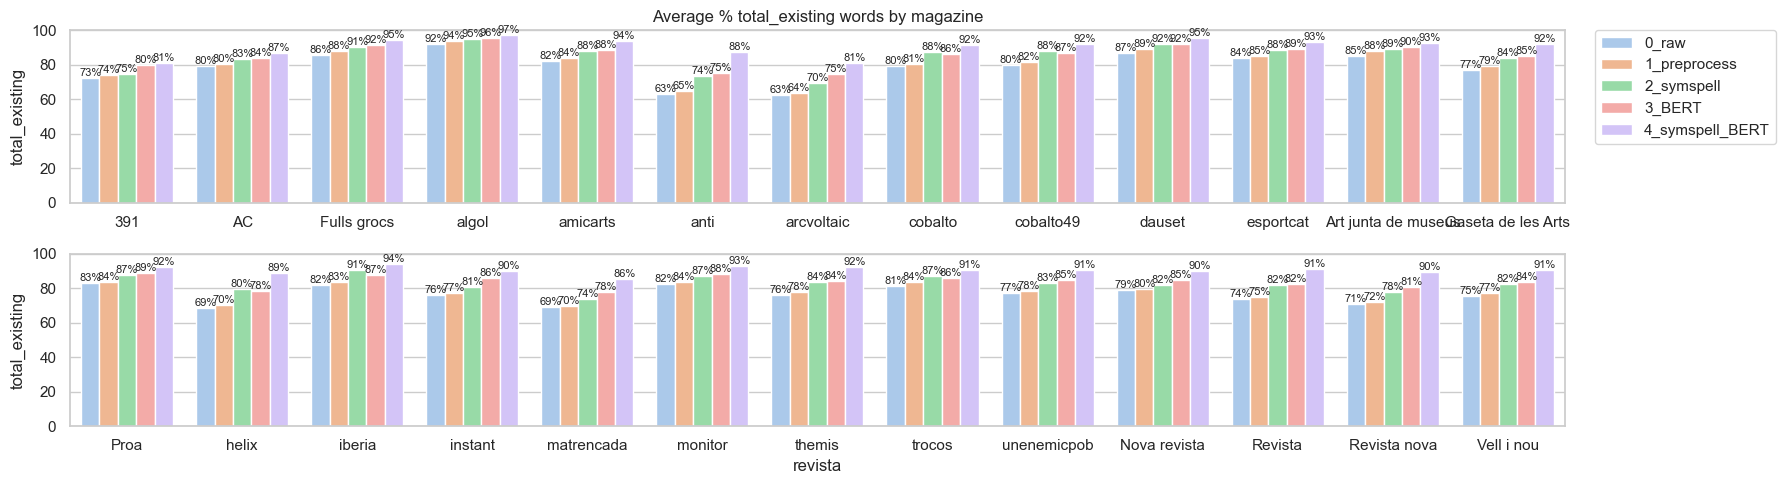

In [86]:
revista_comparison('total_existing', '2_percentage_existing_words_by_magazine.png', '%')

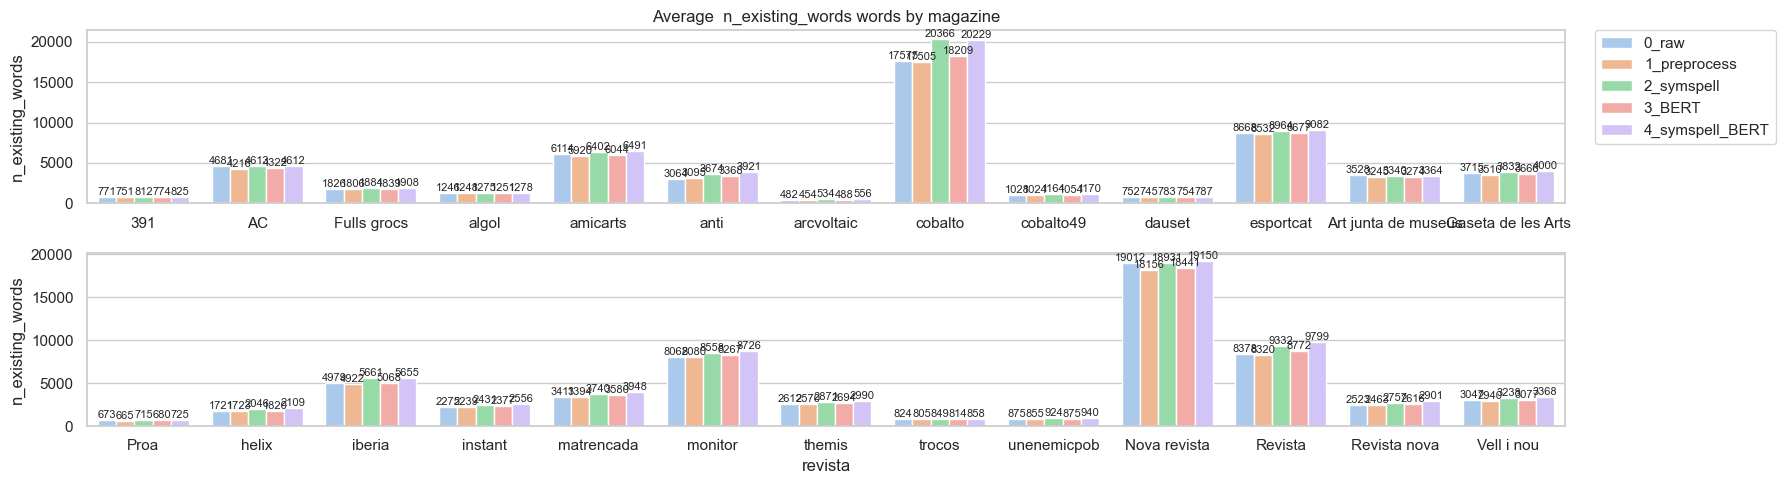

In [87]:
revista_comparison('n_existing_words', '3_avg_existing_words_by_magazine.png')

#### data split by blocs

In [40]:
def revista_comparison_bloc1(variable, unit=''):
    batch1 = ['391','AC','Fulls grocs','Proa','algol','amicarts','anti','arcvoltaic','cobalto','cobalto49']
    batch2 = ['dauset','esportcat','helix','iberia','instant','matrencada','monitor','themis','trocos','unenemicpob']

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
    
    ax[0] = sns.barplot(ax = ax[0], x='revista', y=variable, hue='experiment', 
                     data=data[(data['bloc']=='bloc1') & (data['revista'].isin(batch1))], errorbar=None)
    ax[1] = sns.barplot(ax = ax[1], x='revista', y=variable, hue='experiment', 
                     data=data[(data['bloc']=='bloc1') & (data['revista'].isin(batch2))], errorbar=None, legend=False)
    for ax_ in ax:
        for container in ax_.containers:
            f_exp = '{:.0f}'
            ax_.bar_label(container, fmt=f'{f_exp}{unit}', fontsize=8)
        if unit == '%':
            ax_.set(ylim=(0, 100))
        #place legend outside top right corner of plot
    ax[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    ax[0].set(title=f'Average {unit} {variable} words by magazine of bloc1', xlabel=None)
    plt.tight_layout();

def revista_comparison_bloc2(variable, unit=''):
    plt.figure(figsize=(12,4))
    ax = sns.barplot(x='revista', y=variable, hue='experiment', data=data[data['bloc']=='bloc2'], errorbar=None)
    for container in ax.containers:
        f_exp = '{:.0f}'
        ax.bar_label(container, fmt=f'{f_exp}{unit}', fontsize=10)
    if unit == '%':
        ax.set(ylim=(0, 100))
    #place legend outside top right corner of plot
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    ax.set(title=f'Average {unit} {variable} words by magazine of bloc2');

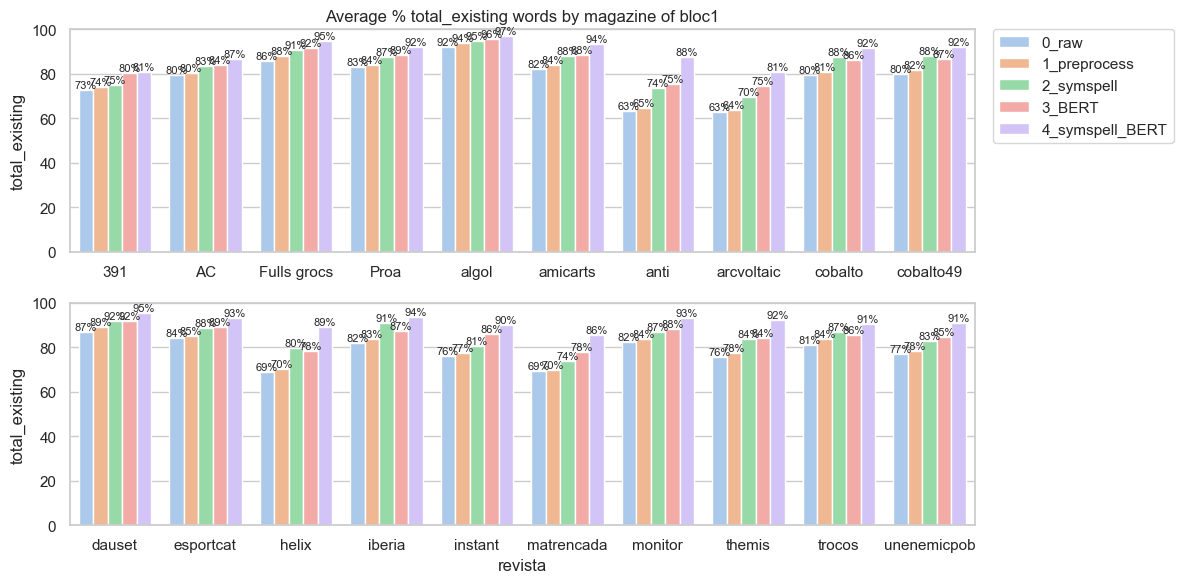

In [41]:
revista_comparison_bloc1('total_existing', '%')

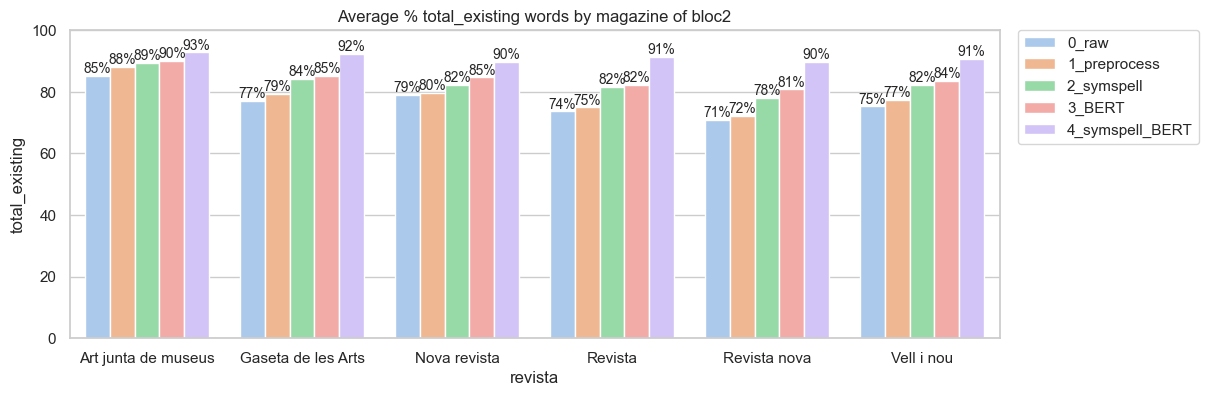

In [42]:
revista_comparison_bloc2('total_existing', '%')

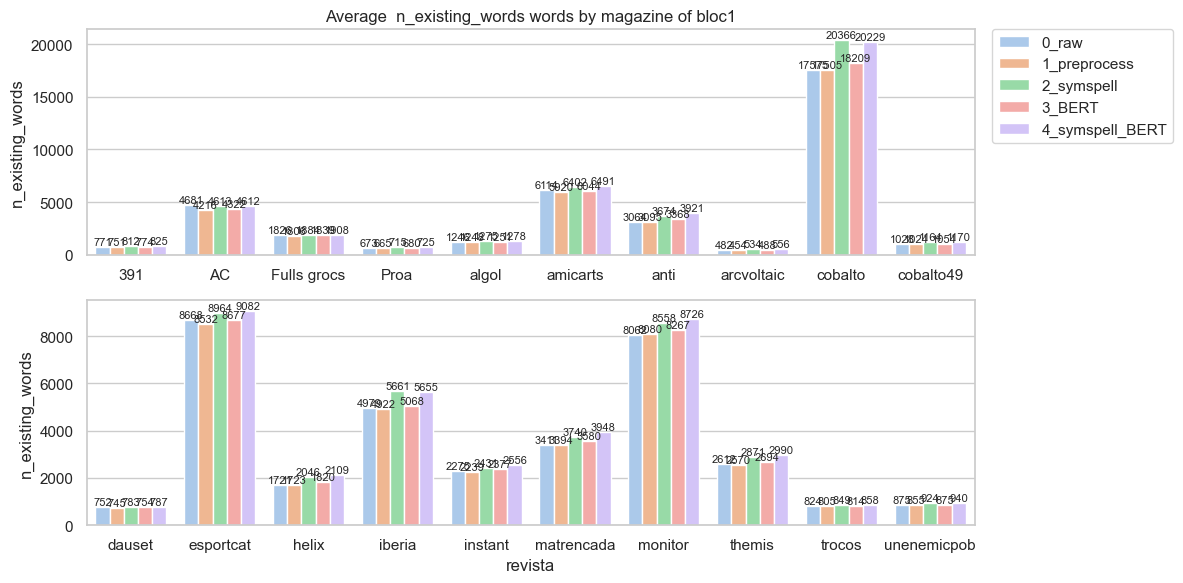

In [43]:
revista_comparison_bloc1('n_existing_words')

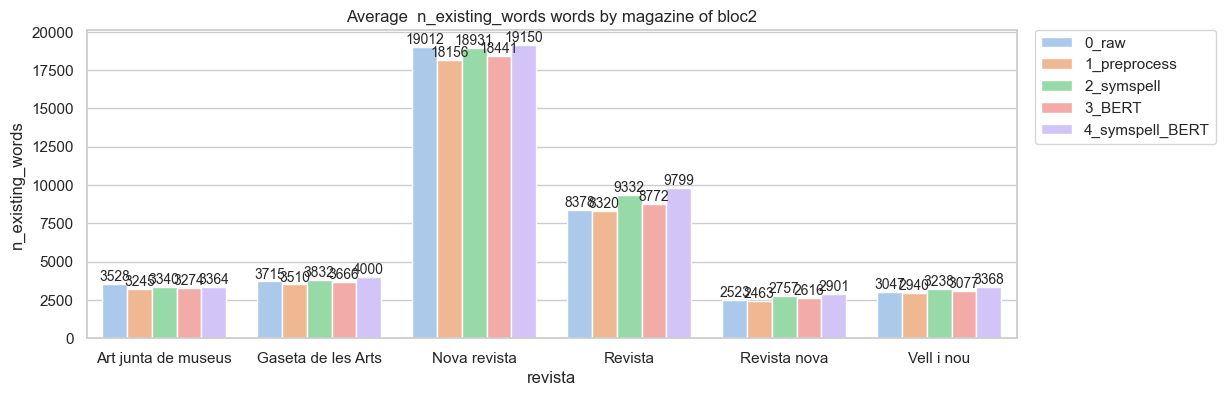

In [44]:
revista_comparison_bloc2('n_existing_words')

### Division by language

#### all data

In [95]:
lang_cols = ['ca_perc','es_perc','fr_perc','it_perc']
perc_lang_data = perc_lang_data[['experiment'] + lang_cols]
perc_lang_data = pd.melt(perc_lang_data, id_vars=['experiment'], value_vars=lang_cols)
di = {'ca_perc': 'Catalan', 'es_perc': 'Spanish', 'fr_perc': 'French', 'it_perc': 'Italian'}
perc_lang_data = perc_lang_data.replace({'variable': di})
perc_lang_data.rename(columns={'variable': 'language'}, inplace=True)

/Users/marinarosell/EURECAT/metaglam/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


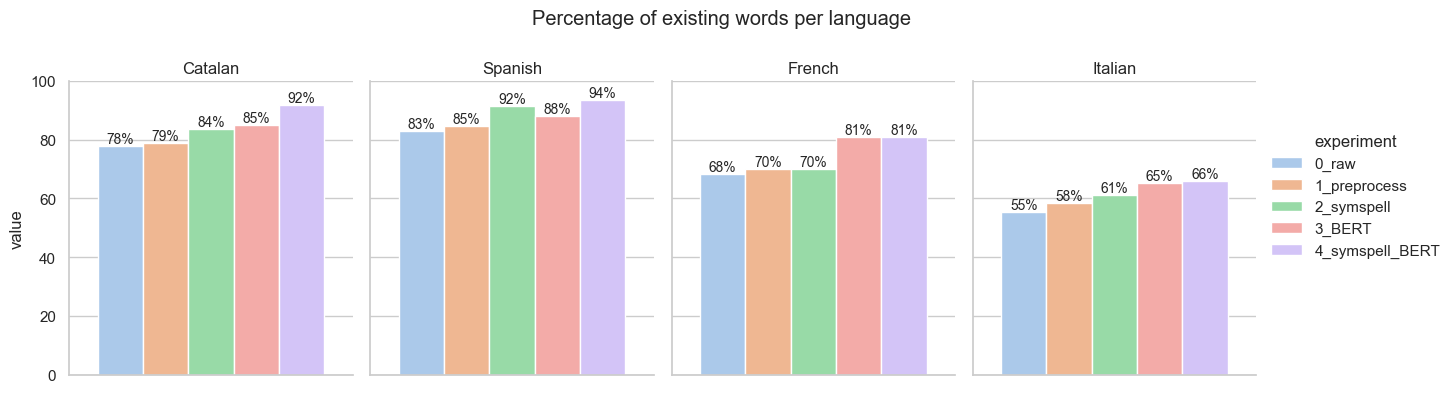

In [99]:
ax = sns.catplot(col='language', y='value', hue='experiment', data=perc_lang_data, errorbar=None, kind='bar', 
                 sharey=True, legend_out=True, height=4, aspect=.8)

for plot in ax.axes[0]:
    for container in plot.containers:
        plot.bar_label(container, fmt='{:.0f}%', fontsize=10)

ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Percentage of existing words per language')
ax.set_titles("{col_name}")
ax.set(ylim=(0, 100))

ax.fig.savefig("4_percentage_existing_words_per_language.png");

#plt.suptitle('Total number of existing words by language', fontsize=13)
    
#ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#ax.fig.tight_layout();

In [102]:
lang_cols = ['ca_existing_words', 'es_existing_words', 'fr_existing_words', 'it_existing_words']
data_lang_existing = data[['experiment', 'revista'] + lang_cols]
data_lang_existing = pd.melt(data_lang_existing, id_vars=['experiment', 'revista'], value_vars=lang_cols)
di = {'ca_existing_words': 'Catalan', 'es_existing_words': 'Spanish', 'fr_existing_words': 'French', 'it_existing_words': 'Italian'}
data_lang_existing = data_lang_existing.replace({'variable': di})
data_lang_existing.rename(columns={'variable': 'language'}, inplace=True)

/Users/marinarosell/EURECAT/metaglam/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


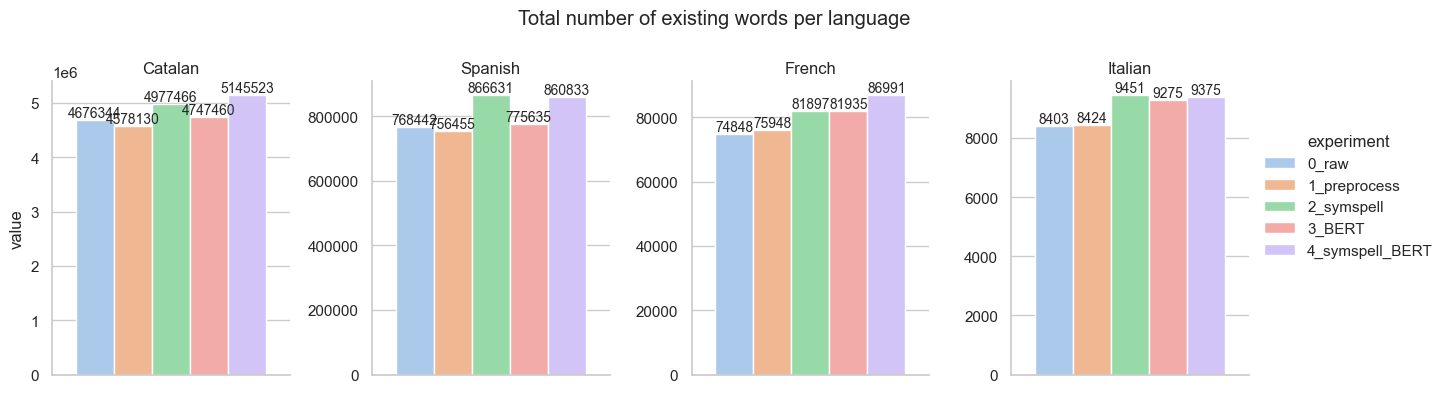

In [103]:
ax = sns.catplot(col='language', y='value', hue='experiment', data=data_lang_existing, errorbar=None, estimator='sum', kind='bar', 
                 sharey=False, legend_out=True, height=4, aspect=.8)

for plot in ax.axes[0]:
    for container in plot.containers:
        plot.bar_label(container, fmt='{:.0f}', fontsize=10)

ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Total number of existing words per language')
ax.set_titles("{col_name}")

ax.fig.savefig("5_total_existing_words_per_language.png");

#### data split by blocs

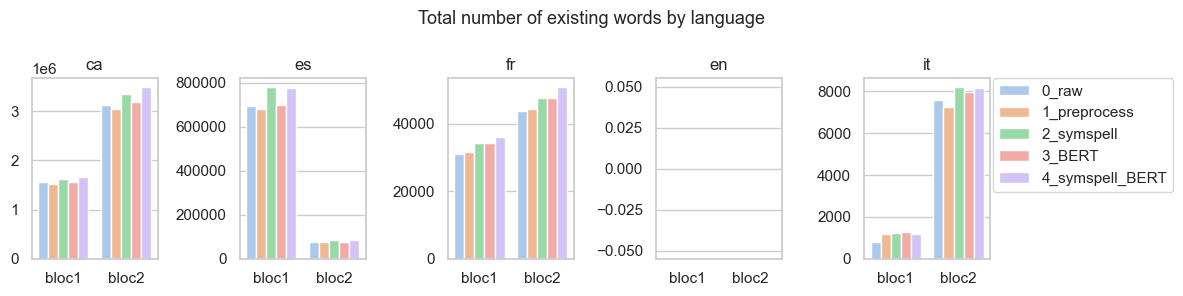

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12,3))
lang_cols = ['ca_existing_words', 'es_existing_words', 'fr_existing_words', 'en_existing_words', 'it_existing_words']
for i in range(len(axs)):
    axs[i] = sns.barplot(ax = axs[i], x='bloc', y=lang_cols[i], hue='experiment', data=data, errorbar=None, 
                         legend=True if i == len(axs)-1 else False, estimator='sum')
    axs[i].set(title=lang_cols[i][:2], ylabel='', xlabel='')
    #for container in axs[i].containers:
    #    axs[i].bar_label(container, fmt='{:.0f}', fontsize=10)


plt.suptitle('Total number of existing words by language', fontsize=13)
    
axs[len(axs)-1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout();

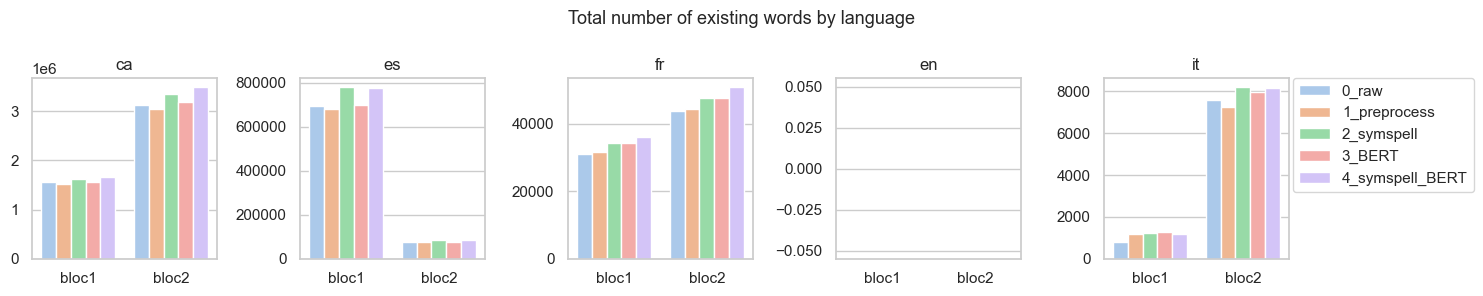

In [50]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15,3))
lang_cols = ['ca_existing_words', 'es_existing_words', 'fr_existing_words', 'en_existing_words', 'it_existing_words']
for i in range(len(axs)):
    axs[i] = sns.barplot(ax = axs[i], x='bloc', y=lang_cols[i], hue='experiment', data=data, errorbar=None, 
                         legend=True if i == len(axs)-1 else False, estimator='sum')
    axs[i].set(title=lang_cols[i][:2], ylabel='', xlabel='')
    #for container in axs[i].containers:
    #    axs[i].bar_label(container, fmt='{:.0f}', fontsize=10)


plt.suptitle('Total number of existing words by language', fontsize=13)
    
axs[len(axs)-1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout();